## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
number_mice = len(study_data['Mouse ID'])
print(number_mice)

1893


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = study_data.duplicated(subset=(['Mouse ID', 'Timepoint']))
show_duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data))

1888


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats_df = pd.DataFrame({
    'Mean': tumor_mean, 
    'Median': tumor_median, 
    'Variance': tumor_variance, 
    'Std. Deviation': tumor_std, 
    'SEM': tumor_sem
})
tumor_stats_df



,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

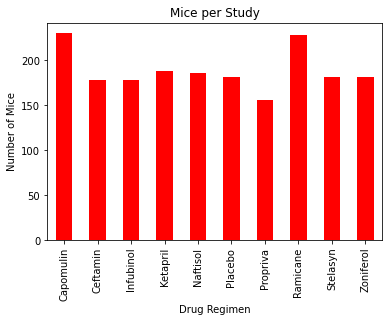

In [75]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_data.groupby('Drug Regimen')['Mouse ID'].count()
mice_chart_pd = mice_count.plot(kind='bar', title='Mice per Study', color='r')
mice_chart_pd.set_xlabel("Drug Regimen")
mice_chart_pd.set_ylabel("Number of Mice")



In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
